## Production Line Efficiency

### Object: Model comparison on the relationship between product features and the time required for assembly

Comparing performance of four different regression models on predicting corelation depandent and independent variables 

Data overview: training set comprises 4209 records over 376 features of the products and corresponding assembly time

Roadmap: 
    1. Feature Analysis
    2. Dimentionality reduction
    3. Filtering outliers
    4. Train-test split
    5. Modeling: Random Forest Regressor, 
                 Gredien Boosting Regressor, 
                 AdaBoost Regressor,
                 Bagging Regressor
       Compare performance between models


In [2]:
import pandas as pd
import numpy as np 

from sklearn import preprocessing

In [3]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

### An overview of training data

In [4]:
train_set.iloc[:6, :16]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,0,0,0,0,1,0


In [5]:
train_set.shape

(4209, 378)

In [6]:
test_set.iloc[:6, :16]

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0
5,8,y,aa,ai,e,d,x,g,s,0,0,0,0,0,0,0


In [7]:
test_set.shape

(4209, 377)

In [8]:
train_set.columns.difference(test_set.columns)

Index(['y'], dtype='object')

### Confirmation to data types in training data

In [9]:
type_df = train_set.dtypes.reset_index()
type_df.columns = ["Count", "Column Type"]
type_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


### Distribution of values in integer columns 

In [11]:
train_set.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from matplotlib import pyplot as plt
import seaborn as sns 

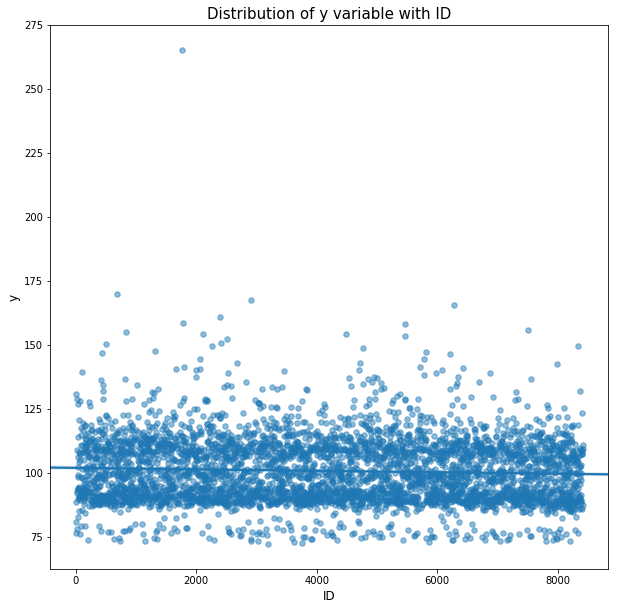

In [59]:
var_name = "ID"
plt.figure(figsize=(10,10))
sns.regplot(x=var_name, y='y', data=train_set, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+ var_name, fontsize=15)
plt.show()

#plt.clf()

### Detecting and filtering outliers in training data

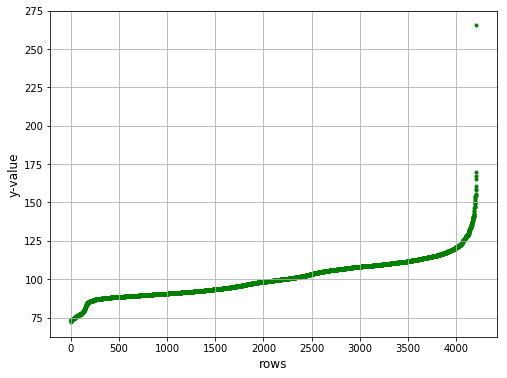

In [64]:
from matplotlib import pyplot as plt

# Plotting y distribution over rows
plt.figure(figsize=(8,6))
plt.scatter(range(train_set.shape[0]), np.sort(train_set.y.values), marker = '.', c = 'g')
plt.xlabel('rows', fontsize=12)
plt.ylabel('y-value', fontsize=12)
plt.xticks(np.arange(0, int(train_set.shape[0]), step=500.0))
plt.grid()
plt.show()


In [67]:
train_set['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [68]:
# Dropping outlier(s) 

train_df = train_set[train_set.y < 175]

In [70]:
# Encoding categorical columus

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        le.fit(list(train_df[col].values) + list(test_set[col].values))
        train_df['col'] = le.transform(list(train_df[col].values)).copy()
        test_set['col'] = le.transform(list(test_set[col].values)).copy()


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1a2d9589e8>>
Traceback (most recent call last):
  File "/Library/Python/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
/Library/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Fesature Analysis

In [95]:
cat_col = list(train_df.columns[10:378])

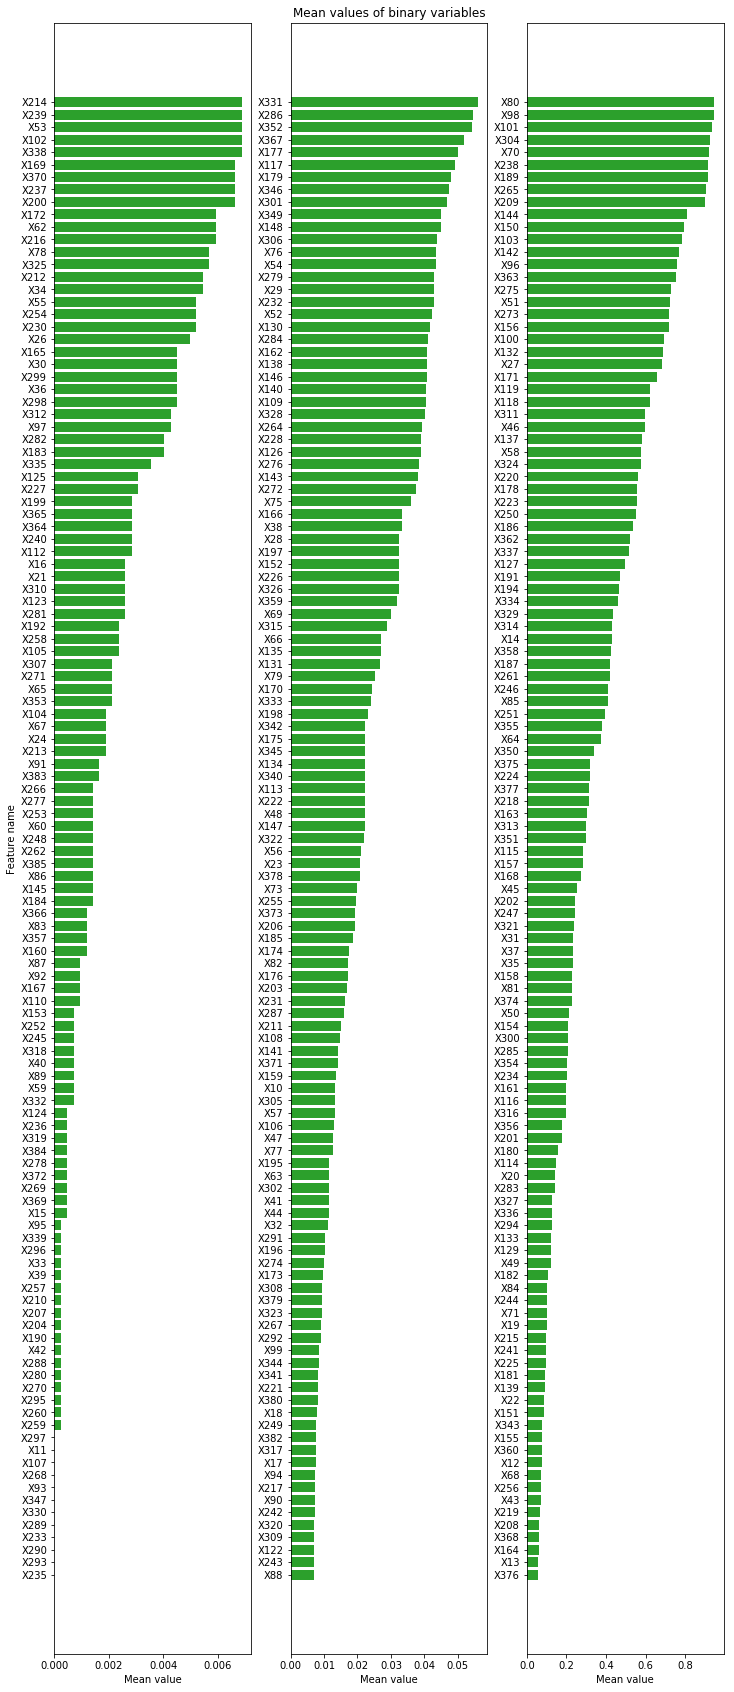

In [100]:
pal = sns.color_palette()

binary_means = [np.mean(train_set[c]) for c in cat_col]
binary_names = np.array(cat_col)[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

### Dimensionality reduction

In [17]:
from sklearn.decomposition import TruncatedSVD, FastICA, PCA  
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

n_comp = 20

# Truncated SVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=20)
tsvd_train = tsvd.fit_transform(train_df.drop(["y"], axis=1))
tsvd_test = tsvd.transform(test_set)

# PCA
pca = PCA(n_components=n_comp, random_state=20)
pca_train = pca.fit_transform(train_df.drop(["y"], axis=1))
pca_test = pca.transform(test_set)

# Fast ICA - inceased tol to 0.01 to avoid warning of not-converge
ica = FastICA(n_components=n_comp, random_state=20, tol=0.01)   
ica_train = ica.fit_transform(train_df.drop(["y"], axis=1))
ica_test = ica.transform(test_set)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=20)
grp_train = grp.fit_transform(train_df.drop(["y"], axis=1))
grp_test = grp.transform(test_set)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=20)
srp_train = srp.fit_transform(train_df.drop(["y"], axis=1))
srp_test = srp.transform(test_set)

In [18]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


In [20]:
work_columns = list(set(train_df.columns) - set(['y']))

for i in range(1, n_comp + 1):
    train_df['pca_' + str(i)] = pca_train[:, i - 1].copy()
    test_set['pca_' + str(i)] = pca_test[:, i - 1].copy()

    train_df['ica_' + str(i)] = ica_train[:, i - 1].copy()
    test_set['ica_' + str(i)] = ica_test[:, i - 1].copy()

    train_df['tsvd_' + str(i)] = tsvd_train[:, i - 1].copy()
    test_set['tsvd_' + str(i)] = tsvd_test[:, i - 1].copy()

    train_df['grp_' + str(i)] = grp_train[:, i - 1].copy()
    test_set['grp_' + str(i)] = grp_test[:, i - 1].copy()

    train_df['srp_' + str(i)] = srp_train[:, i - 1].copy()
    test_set['srp_' + str(i)] = srp_test[:, i - 1].copy()

/Library/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [36]:
test_set.shape

(4209, 477)

In [38]:
y_train_val = train_df['y'].values
y_mean = np.mean(y_train_val)
id_test = test_set['ID'].values
final_train_df = train_df[work_columns].values
final_test_df = test_set[work_columns].values

In [39]:
final_test_df.shape

(4209, 377)

In [40]:
final_train_df.shape

(4208, 377)

### Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_train_df, y_train_val, train_size=0.8, test_size=0.2)

### Modelling: Random Forest Regressor model

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfgr = RandomForestRegressor(n_estimators=200, 
                             max_depth=10,
                             max_leaf_nodes=60,
                             min_samples_leaf=4, 
                             max_features=0.2, 
                             n_jobs=-1, 
                             random_state=50,
                             oob_score=True, 
                            )
rfgr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.2, max_leaf_nodes=60, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [68]:
rfgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.2, max_leaf_nodes=60, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [69]:
y0_pred = rfgr.predict(final_test_df)
y0_pred

array([ 78.00558268,  94.60894802,  77.80627873, ...,  92.84575829,
       112.40477541,  92.77642912])

#### Model Evaluation

In [70]:
def model_eval(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy: {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_accuracy = model_eval(rfgr, X_test, y_test)


Model Performance
Average Error: 5.3265 degrees.
Accuracy: 94.93%.


### Modelling: Gredient Boosting Regressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, 
                                random_state=50,
                                max_features = "auto", 
                                min_samples_leaf = 50,
                                verbose=5)

In [90]:
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         137.1521            6.03s
         2         123.0454            5.71s
         3         111.6054            5.48s
         4         102.3244            5.46s
         5          94.7968            5.41s
         6          88.6876            5.29s
         7          83.7322            5.18s
         8          79.7080            5.14s
         9          76.4394            5.08s
        10          73.7819            5.03s
        11          71.6221            4.96s
        12          69.8659            4.91s
        13          68.4373            4.87s
        14          67.2725            4.80s
        15          66.3240            4.75s
        16          65.5456            4.70s
        17          64.8913            4.64s
        18          64.3463            4.59s
        19          63.8690            4.52s
        20          63.4364            4.46s
        21          63.0983            4.40s
        2

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=50, subsample=1.0, verbose=5,
             warm_start=False)

In [94]:
y1_pred = gbr.predict(final_test_df)
y1_pred

array([ 78.6386858 ,  93.94855078,  79.19302177, ...,  91.21326293,
       109.49620347,  90.85686668])

#### Model Evaluation

In [95]:
gbr_accuracy = model_eval(gbr, X_test, y_test)

Model Performance
Average Error: 5.2794 degrees.
Accuracy: 94.97%.


### Modelling: AdaBoost Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor

adr = AdaBoostRegressor(learning_rate=0.1, 
                        loss='square', 
                        n_estimators=100)


In [98]:
adr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=100, random_state=None)

In [99]:
y2_pred = adr.predict(final_test_df)
y2_pred

array([ 78.30641509, 105.10234343,  80.43433333, ...,  98.86514019,
       113.67944359, 103.88594114])

#### Model Evaluation

In [101]:
adr_accuracy = model_eval(adr, X_test, y_test)

Model Performance
Average Error: 7.9830 degrees.
Accuracy: 91.96%.


### Modelling: Bagging Regressor

In [103]:
from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor(n_jobs=-1,
                       n_estimators=200,
                       max_samples=100,
                       bootstrap=True,
                       random_state=50,
                       oob_score=True)

In [104]:
bgr.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=100,
         n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
         verbose=0, warm_start=False)

In [106]:
y3_pred = bgr.predict(final_test_df)
y3_pred

array([ 79.87235,  98.52195,  82.21715, ...,  95.5634 , 112.5957 ,
        94.43195])

#### Model Evaluation

In [107]:
bgr_accuracy = model_eval(bgr, X_test, y_test)

Model Performance
Average Error: 5.6962 degrees.
Accuracy: 94.54%.


In [108]:
import pickle

def save_model_pickle(estimator, model_url):             
    save_it = model_url
    pickle.dump(estimator, open(save_it, 'wb'))       

submission = pd.DataFrame()
submission['ID'] = id_test
submission['y'] = y_pred

submission.to_csv('DB_Manu_sub.csv', index=False)
save_model_pickle(rfgr, 'DB_rfgrModel.csv')
save_model_pickle(gbr, 'DB_grbModel.csv')
save_model_pickle(bgr, 'DB_bgbModel.csv')
